In [117]:
#import the packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    precision_recall_curve,
    roc_auc_score, 
    roc_curve)

In [118]:
df = pd.read_csv("C:/Users/abhis/JupyterNotebooks/CI_Classes/LogisticRegressionCaseStudy/adult.csv")

In [119]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [121]:
# Check for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [122]:
# Check for duplicates
df.duplicated().sum()

24

## Observations

1. There are no missing values in the dataset.
2. There are 24 duplicate records present in the dataset. Let's treat the duplicate records before we go ahead.

In [123]:
# Drop the duplicates inplace
df.drop_duplicates(inplace=True)

In [124]:
# Check the shape
df.shape

(32537, 15)

In [125]:
# Define five point summary of the data
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Observations

**age**: Average age of people in the dataset is around 38 years near to median value, age has a wide range from 17 to 90 years.

**education.num**: The average number of years spent in education is ~10 years which is similar to median. There's a large difference between the minimum value and first quartile which indicates that there might be outliers present in this variable.

**capital.gain**: There's a huge gap in the third quartile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0 which makes it irrelevant.

**capital.loss**: Same as capital gain there's a huge difference in the third quartile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0 which makes it irrelevant.

**hours.per.week**: The avrage working hours are 40 hrs per week which is similar to median. A vast difference in minimum value and first quartile, as well as third quartile and the maximum value, indicates that there might be outliers present in the variable.

## Univariate Analysis

In [126]:
def distribution_plot(data, feature, figsize=(8, 5), bins=10, kde=False):
    f2, ax_hist = plt.subplots(
        nrows=1,  # Number of rows of the subplot grid=1
        figsize=figsize,
    )  # creating the 2 subplots
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

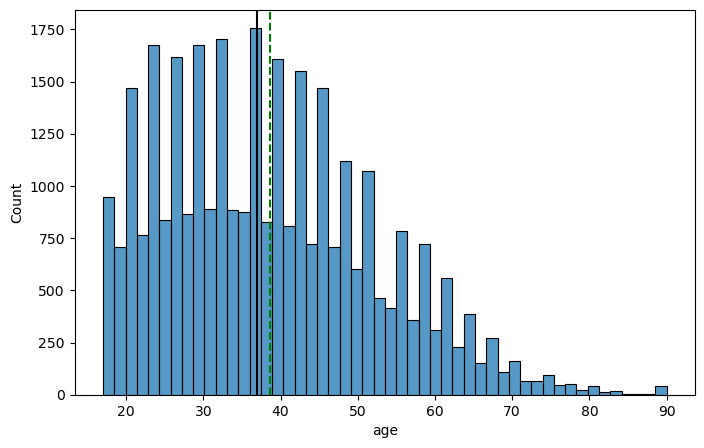

In [127]:
distribution_plot(df, "age", bins=50)

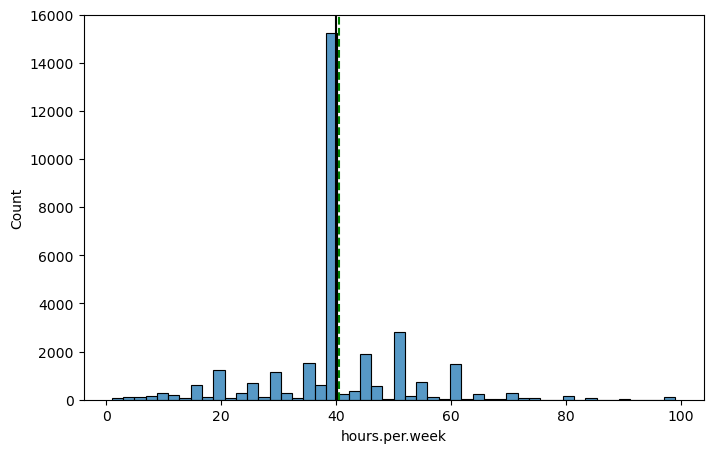

In [128]:
distribution_plot(df, "hours.per.week", bins=50)

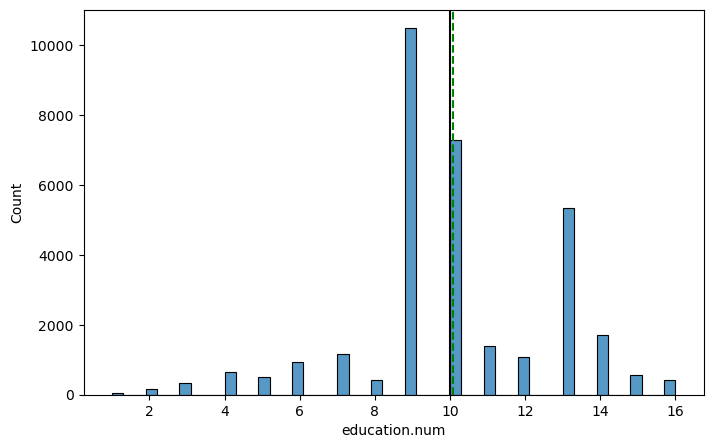

In [129]:
distribution_plot(df, "education.num", bins=50)

In [130]:
df['workclass'].value_counts(normalize=True).head()

Private             0.696837
Self-emp-not-inc    0.078065
Local-gov           0.064327
?                   0.056428
State-gov           0.039893
Name: workclass, dtype: float64

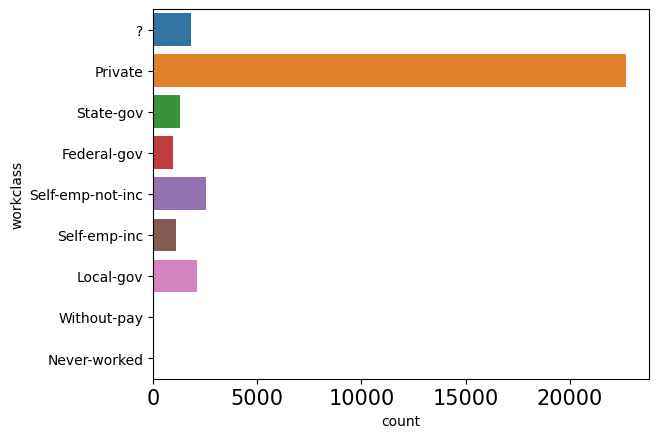

In [131]:
# Analyze the Categorical Variables
sns.countplot(y=df.workclass)
plt.xticks(rotation=0, fontsize=15)
plt.show()

In [132]:
df['native.country'].value_counts(normalize=True).head()

United-States    0.895995
Mexico           0.019639
?                0.017887
Philippines      0.006085
Germany          0.004211
Name: native.country, dtype: float64

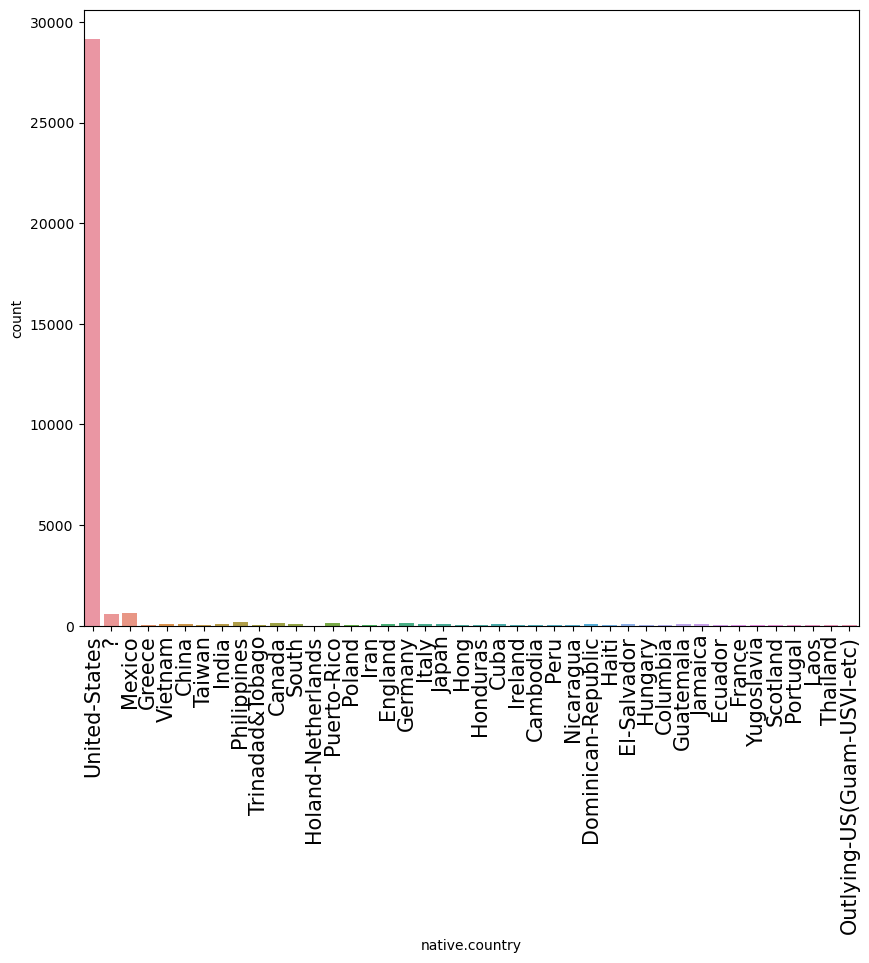

In [133]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['native.country'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [134]:
df['income'].value_counts(normalize=True).head()

<=50K    0.759074
>50K     0.240926
Name: income, dtype: float64

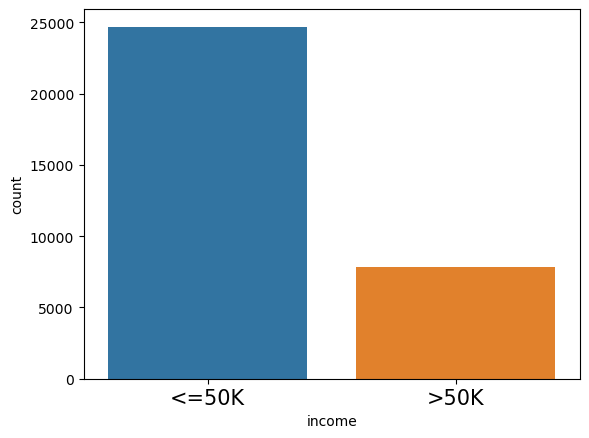

In [135]:
sns.countplot(x=df['income'])
plt.xticks(rotation=0, fontsize=15)
plt.show()

In [136]:
df['occupation'].value_counts(normalize=True).head()

Prof-specialty     0.127117
Craft-repair       0.125826
Exec-managerial    0.124935
Adm-clerical       0.115807
Sales              0.112180
Name: occupation, dtype: float64

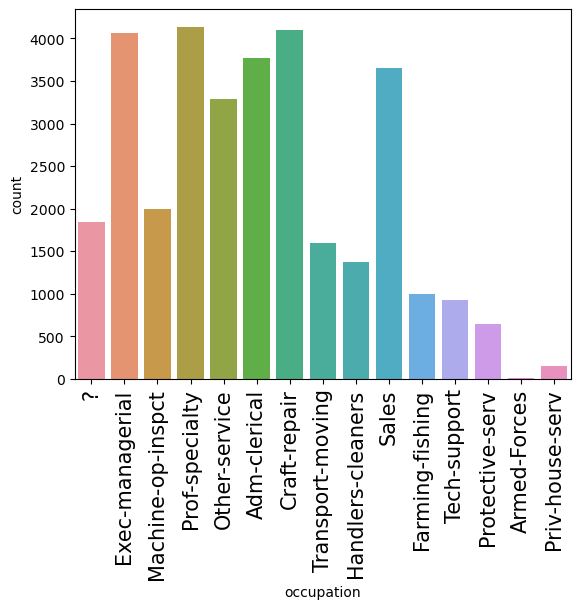

In [137]:
sns.countplot(x=df['occupation'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [138]:
df['race'].value_counts(normalize=True).head()

White                 0.854258
Black                 0.095952
Asian-Pac-Islander    0.031902
Amer-Indian-Eskimo    0.009558
Other                 0.008329
Name: race, dtype: float64

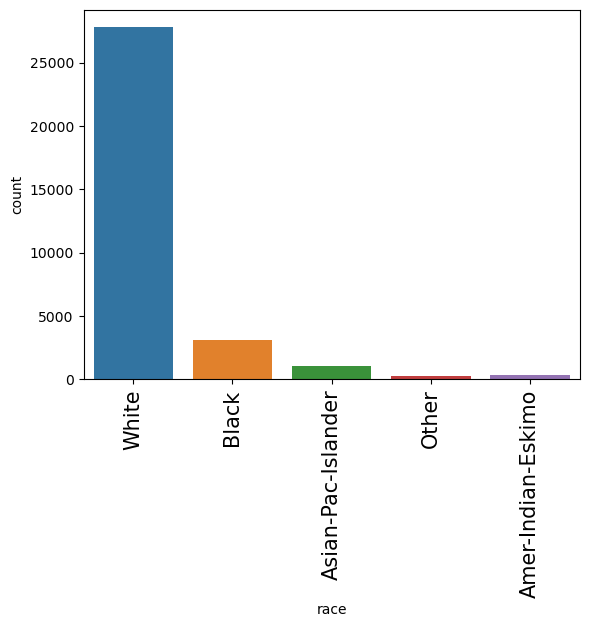

In [139]:
sns.countplot(x=df['race'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [140]:
df['sex'].value_counts(normalize=True).head()

Male      0.669238
Female    0.330762
Name: sex, dtype: float64

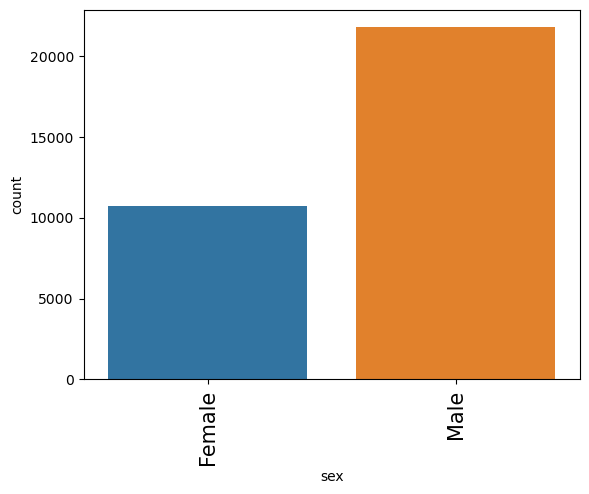

In [141]:
sns.countplot(x=df['sex'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [142]:
df['marital.status'].value_counts(normalize=True).head()

Married-civ-spouse    0.460092
Never-married         0.327842
Divorced              0.136491
Separated             0.031503
Widowed               0.030519
Name: marital.status, dtype: float64

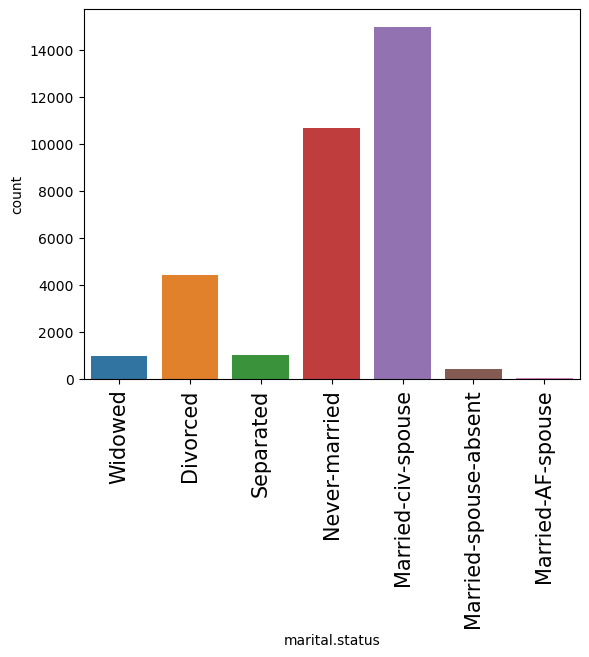

In [143]:
sns.countplot(x=df['marital.status'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

## Observations

1. Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week.

2. There are some outliers in numerical variables like age or hours per week but the extremes are in a realistic range and therefore could be helpful in the modeling process.

2. ~70% of the observations are from the Private sector working class.

3. ~90% of the people are native to USA. This variable can be grouped to define continents for instance, North or South America.

4. Married people dominates the dataset with higher number of observations than non-married people. We can club the groups together in married vs unmarried people.

5. ~76% have a salary below 50K while ~24% of the observations have a salary above 50K.

## Bivariate Analysis

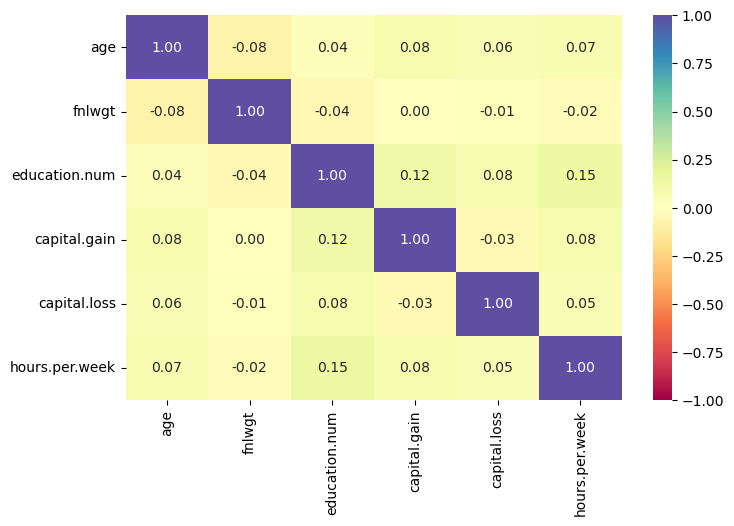

In [144]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

<AxesSubplot:xlabel='income'>

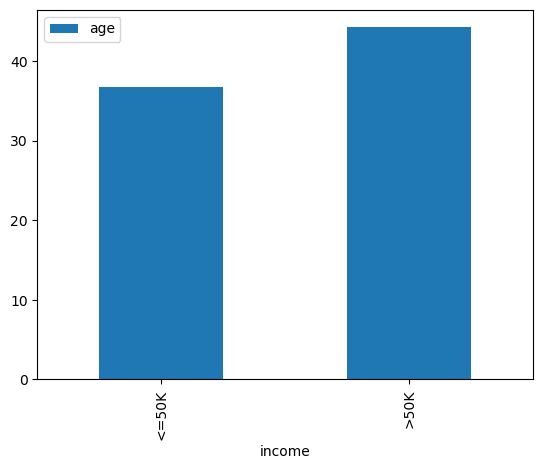

In [145]:
df.pivot_table(index = 'income', values = 'age', aggfunc='mean').plot(kind = 'bar')

<AxesSubplot:xlabel='income'>

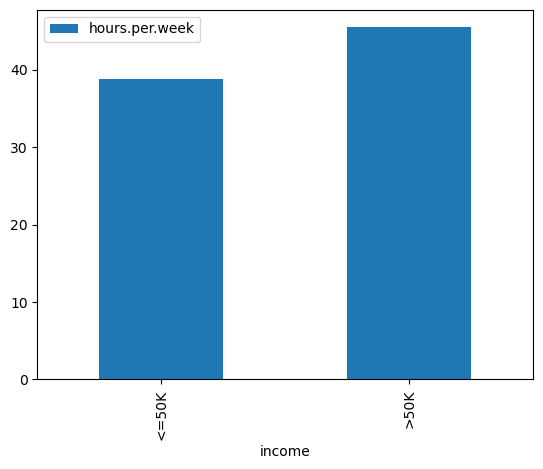

In [146]:
df.pivot_table(index = 'income', values = 'hours.per.week', aggfunc='mean').plot(kind = 'bar')

<AxesSubplot:xlabel='income'>

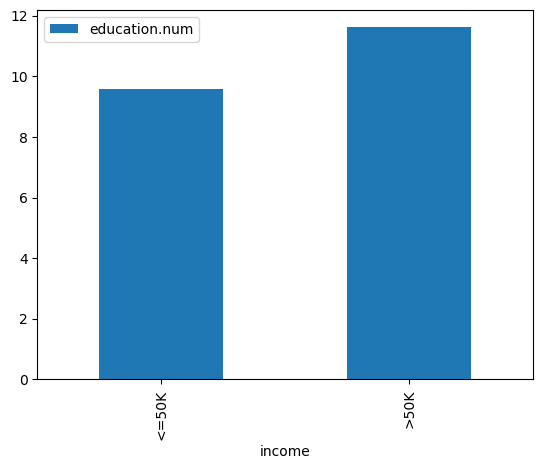

In [147]:
df.pivot_table(index = 'income', values = 'education.num', aggfunc='mean').plot(kind = 'bar')

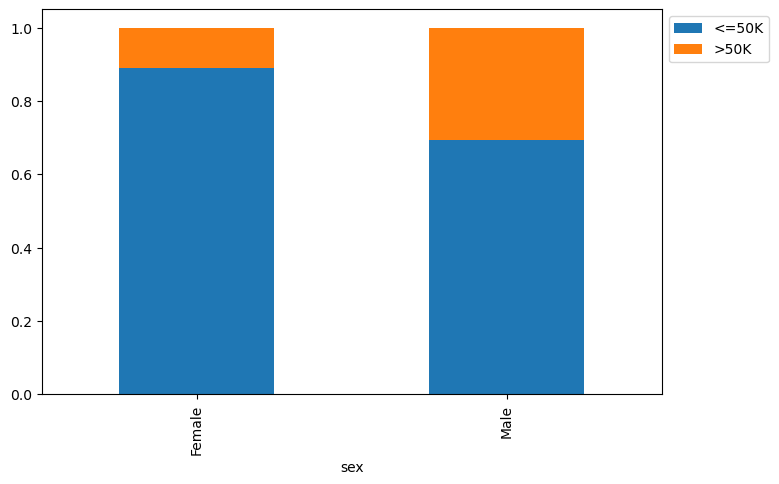

In [148]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['sex'], df['income'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

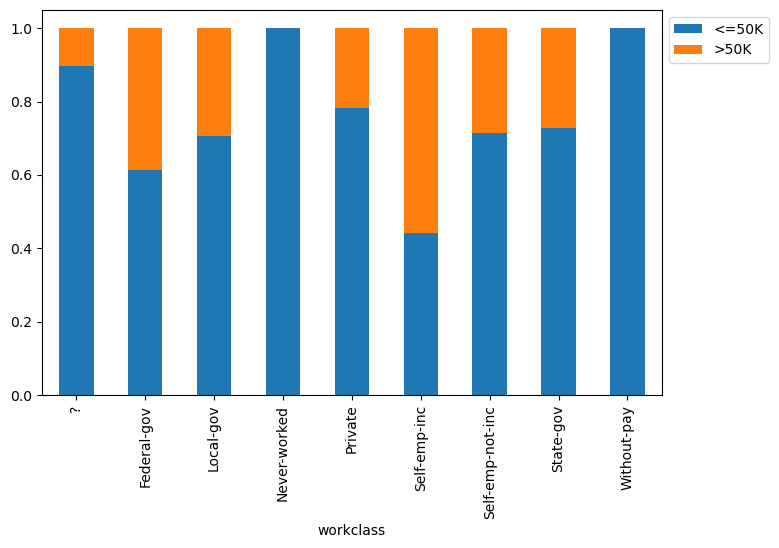

In [149]:
summ = pd.crosstab(df['workclass'], df['income'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

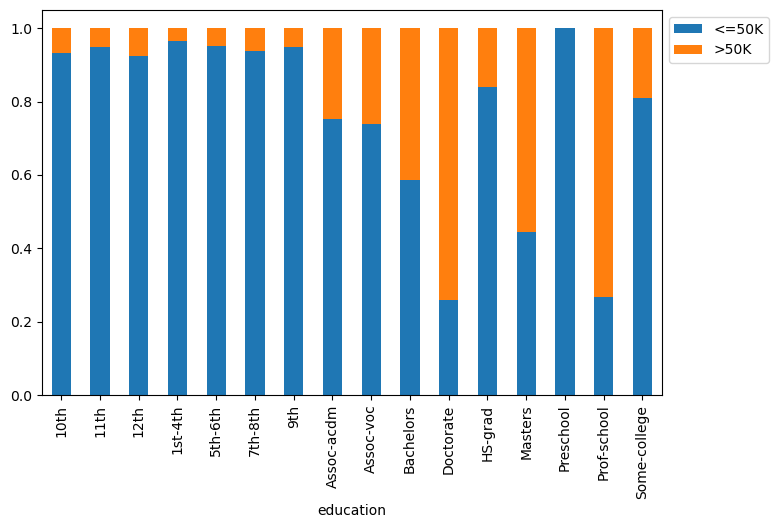

In [150]:
summ = pd.crosstab(df['education'], df['income'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

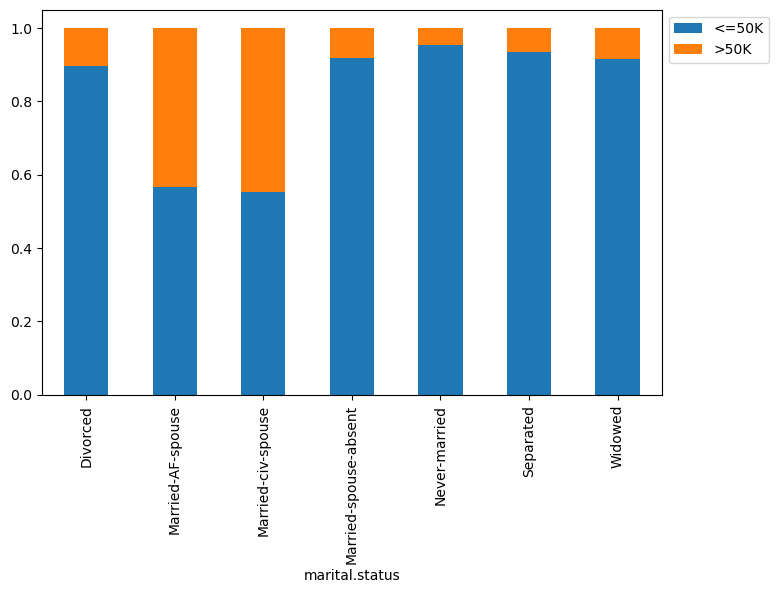

In [151]:
summ = pd.crosstab(df['marital.status'], df['income'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

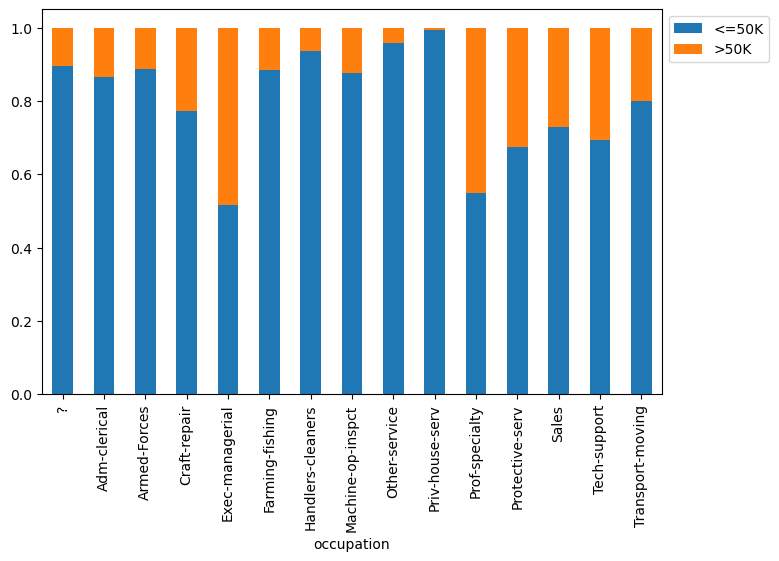

In [152]:
summ = pd.crosstab(df['occupation'], df['income'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

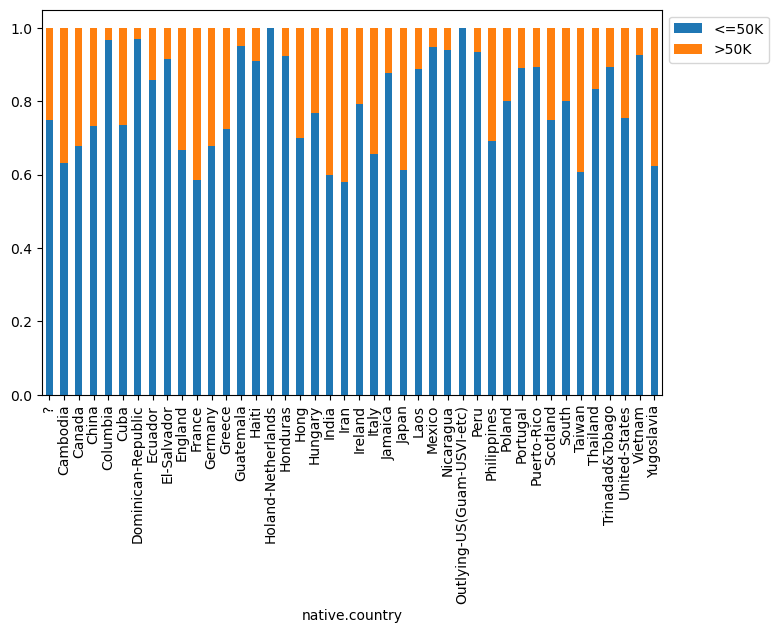

In [153]:
summ = pd.crosstab(df['native.country'], df['income'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

## Observations

1. There are not any high correlations amongst the numerical variables.
2. There is pay gap that exists in society as ~30% males have more than 50k salary compared to only ~10% females. This should be investigated further before formulating policy to ensure equal pay.
3. There is positive relation between education and salary, the higher the education higher is the salary.
4. People with lower occupations like handlers-cleaners, farming-fishing, Private house service, etc. have a higher likelihood of having below low salary.
5. People with higher age, number of hours per week in work and number of years in education tend to have higher income (>50k).
6. Self employed or government employess have higher proportions for people earning more than 50k compared to rest of the people.

## Feature Engineering

#### 1. Dropping Unnecessary variables

In [154]:
# Let's closely analyze capital gain and loss

df['capital.gain'].value_counts(normalize=True).head()

0        0.916649
15024    0.010665
7688     0.008729
7298     0.007561
99999    0.004887
Name: capital.gain, dtype: float64

In [155]:
df['capital.loss'].value_counts(normalize=True).head()

0       0.953315
1902    0.006208
1977    0.005163
1887    0.004887
1485    0.001567
Name: capital.loss, dtype: float64

**Capital Gain** - >90% of the observations are 0.

**Capital Loss** - >95% of the observations are 0.

In [156]:
df.drop(["capital.gain", "capital.loss"], axis=1, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


#### 2. Grouping native country

In [157]:
# Group the country coulumn into respective continents

mapper = {'China': 'asia', 'Hong': 'asia', 'India': 'asia', 'Iran': 'asia', 'Cambodia': 'asia', 'Japan': 'asia', 'Laos': 'asia', 'Philippines': 'asia', 'Vietnam': 'asia', 'Taiwan': 'asia', 'Thailand': 'asia', 
         'England': 'europe', 'France': 'europe', 'Germany': 'europe', 'Greece': 'europe', 'Holand-Netherlands': 'europe', 'Hungary': 'europe', 'Ireland': 'europe', 'Italy': 'europe', 'Poland': 'europe', 'Portugal': 'europe', 'Scotland': 'europe', 'Yugoslavia': 'europe',
         'Canada':'NorthAmerica','United-States':'NorthAmerica','Puerto-Rico':'NorthAmerica',
         'Columbia': 'SA', 'Cuba': 'SA', 'Dominican-Republic': 'SA', 'Ecuador': 'SA', 'El-Salvador': 'SA', 'Guatemala': 'SA', 'Haiti': 'SA', 'Honduras': 'SA', 'Mexico': 'SA', 'Nicaragua': 'SA', 'Outlying-US(Guam-USVI-etc)': 'SA', 'Peru': 'SA', 'Jamaica': 'SA', 'Trinadad&Tobago': 'SA',
         'South':'Others', '?': 'Others'}
df.replace({'native.country': mapper},inplace=True)

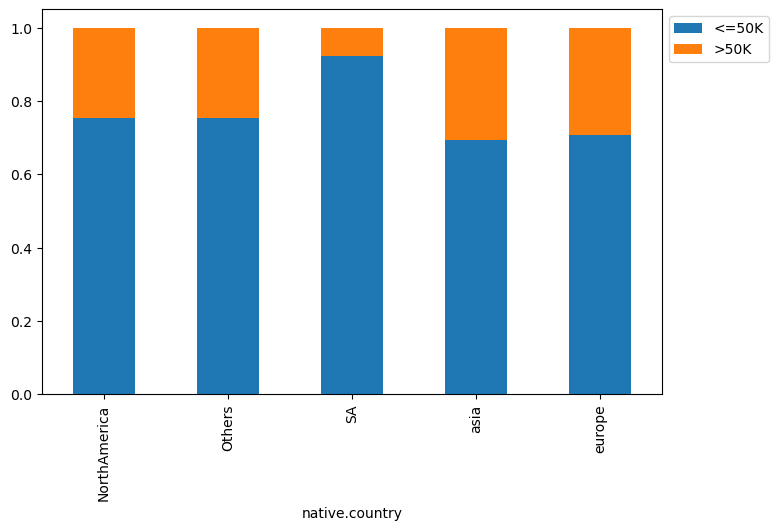

In [158]:
summ = pd.crosstab(df['native.country'], df['income'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

#### 3. Grouping Marital Status

In [159]:
mapper = {'Widowed': 'Not-Married', 'Divorced': 'Not-Married', 'Separated': 'Not-Married', 
          'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married', 'Married-AF-spouse': 'Married'}
df.replace({'marital.status': mapper},inplace=True)

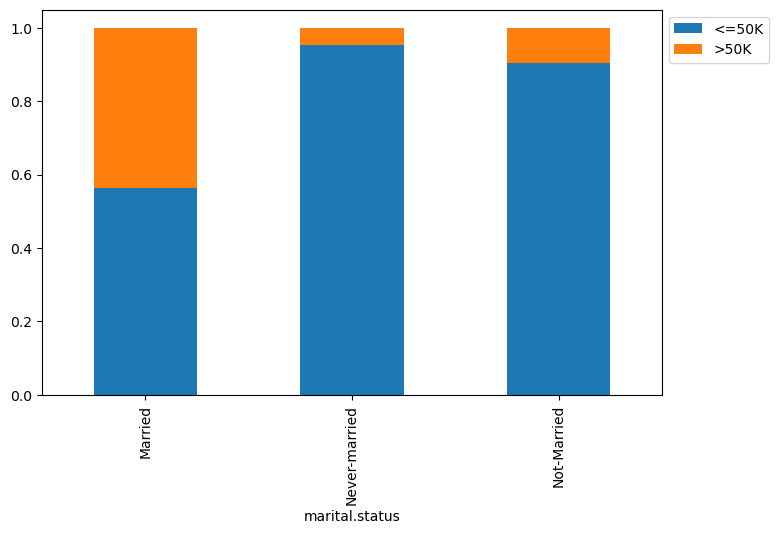

In [160]:
summ = pd.crosstab(df['marital.status'], df['income'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

## Data Preprocessing

In [161]:
# Standardisation of numerical columns

from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['category', 'object']).columns

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,3.770003,?,-1.067955,HS-grad,-0.420679,Not-Married,?,Not-in-family,White,Female,-0.035664,NorthAmerica,<=50K
1,3.183397,Private,-0.539159,HS-grad,-0.420679,Not-Married,Exec-managerial,Not-in-family,White,Female,-1.817516,NorthAmerica,<=50K
2,2.010185,?,-0.035241,Some-college,-0.031815,Not-Married,?,Unmarried,Black,Female,-0.035664,NorthAmerica,<=50K
3,1.130276,Private,-0.468210,7th-8th,-2.364998,Not-Married,Machine-op-inspct,Unmarried,White,Female,-0.035664,NorthAmerica,<=50K
4,0.177041,Private,0.709415,Some-college,-0.031815,Not-Married,Prof-specialty,Own-child,White,Female,-0.035664,NorthAmerica,<=50K


## Creation of dummy variables

In [162]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('income')
df=pd.get_dummies(df,columns=categorical_columns, drop_first=True)

df.head()

,age,fnlwgt,education.num,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Never-married,marital.status_Not-Married,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_Others,native.country_SA,native.country_asia,native.country_europe
0,3.770003,-1.067955,-0.420679,-0.035664,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.183397,-0.539159,-0.420679,-1.817516,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2.010185,-0.035241,-0.031815,-0.035664,<=50K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,1.130276,-0.468210,-2.364998,-0.035664,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0.177041,0.709415,-0.031815,-0.035664,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [163]:
## We will encode the target variable to 1 and 0 where 1 represents the <=50k defining the underpriviledged section of society.
df["income"] = df["income"].apply(lambda x: 1 if x == "<=50K" else 0)

In [164]:
# specifying the independent and dependent set of variables
X = df.drop(["income"], axis=1)
Y = df["income"]

# splitting data in train and test sets
# A good rule of thumb is 70% data in train set and 30% data in test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [165]:
# Analyze the output from train and test data
print(f"Shape of Training set : {X_train.shape}")
print(f"Shape of test set : {X_test.shape}")

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : (22775, 57)
Shape of test set : (9762, 57)
Percentage of classes in training set:
1    0.76281
0    0.23719
Name: income, dtype: float64
Percentage of classes in test set:
1    0.750359
0    0.249641
Name: income, dtype: float64


In [166]:
# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [167]:
accuracy_score(y_train, model.predict(X_train))

0.8351701427003293

In [168]:
accuracy_score(y_test, model.predict(X_test))

0.8351772177832412

## Variance Inflation Factor

**Variance Inflation factor**: VIF estimates the inflation in the variances of the coefficients due to collinearities that exist among the predictors.

**General Rule of thumb:**

If VIF is 1 then there is no correlation among the nth predictor and the remaining predictor variables

If VIF exceeds 5, we say there is moderate multicollinearity

If VIF is equal or exceeding 10, it shows signs of high multicollinearity

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

age                              1.650676
fnlwgt                           1.050479
education.num                   67.636192
hours.per.week                   1.228966
workclass_Federal-gov                 inf
workclass_Local-gov                   inf
workclass_Never-worked           1.007415
workclass_Private                     inf
workclass_Self-emp-inc                inf
workclass_Self-emp-not-inc            inf
workclass_State-gov                   inf
workclass_Without-pay                 inf
education_11th                   2.014350
education_12th                   1.602892
education_1st-4th                2.388886
education_5th-6th                2.896433
education_7th-8th                3.296224
education_9th                    1.972780
education_Assoc-acdm            11.055175
education_Assoc-voc              9.645730
education_Bachelors             69.806315
education_Doctorate             12.499983
education_HS-grad               25.881269

We will remove the variables showing high VIF one by one in order to understand their impact over other variables. We will identify the variable with high VIF at a time and check the VIF again after removing the high VIF variable from the dataset.

In [170]:
X_train1 = X_train.drop("occupation_Other-service", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

age                              1.650676
fnlwgt                           1.050479
education.num                   67.636192
hours.per.week                   1.228966
workclass_Federal-gov            1.813886
workclass_Local-gov              2.716511
workclass_Never-worked           1.007415
workclass_Private                6.033386
workclass_Self-emp-inc           1.971577
workclass_Self-emp-not-inc       3.023939
workclass_State-gov              2.067231
workclass_Without-pay            1.018354
education_11th                   2.014350
education_12th                   1.602892
education_1st-4th                2.388886
education_5th-6th                2.896433
education_7th-8th                3.296224
education_9th                    1.972780
education_Assoc-acdm            11.055175
education_Assoc-voc              9.645730
education_Bachelors             69.806315
education_Doctorate             12.499983
education_HS-grad               25.881269

In [171]:
X_train2 = X_train1.drop("education.num", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

age                              1.644430
fnlwgt                           1.047114
hours.per.week                   1.225684
workclass_Federal-gov            1.810288
workclass_Local-gov              2.768171
workclass_Never-worked           1.006935
workclass_Private               18.430731
workclass_Self-emp-inc           1.979233
workclass_Self-emp-not-inc       3.136290
workclass_State-gov              2.077281
workclass_Without-pay            1.018393
education_11th                   2.000939
education_12th                   1.395247
education_1st-4th                1.189739
education_5th-6th                1.386404
education_7th-8th                1.589056
education_9th                    1.450889
education_Assoc-acdm             1.979023
education_Assoc-voc              2.208470
education_Bachelors              6.125339
education_Doctorate              1.506170
education_HS-grad               10.074779
education_Masters                2.779042

In [172]:
X_train3 = X_train2.drop("race_White", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

age                              1.627658
fnlwgt                           1.046378
hours.per.week                   1.218640
workclass_Federal-gov            1.717536
workclass_Local-gov              2.542112
workclass_Never-worked           1.005165
workclass_Private               15.880175
workclass_Self-emp-inc           1.846565
workclass_Self-emp-not-inc       2.856228
workclass_State-gov              1.942031
workclass_Without-pay            1.017142
education_11th                   1.563488
education_12th                   1.227382
education_1st-4th                1.135114
education_5th-6th                1.265617
education_7th-8th                1.335642
education_9th                    1.256974
education_Assoc-acdm             1.550054
education_Assoc-voc              1.669994
education_Bachelors              3.997493
education_Doctorate              1.331014
education_HS-grad                6.092117
education_Masters                2.079412

In [173]:
X_train4 = X_train3.drop("workclass_Private", axis=1)
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series5))

Series before feature selection: 

age                              1.623261
fnlwgt                           1.046064
hours.per.week                   1.218637
workclass_Federal-gov            1.092449
workclass_Local-gov              1.249525
workclass_Never-worked           1.003416
workclass_Self-emp-inc           1.124227
workclass_Self-emp-not-inc       1.247794
workclass_State-gov              1.125979
workclass_Without-pay            1.005925
education_11th                   1.396687
education_12th                   1.168439
education_1st-4th                1.109647
education_5th-6th                1.219682
education_7th-8th                1.247685
education_9th                    1.188083
education_Assoc-acdm             1.415465
education_Assoc-voc              1.487193
education_Bachelors              3.339383
education_Doctorate              1.281753
education_HS-grad                4.628435
education_Masters                1.883729
education_Preschool              1.036221

In [174]:
X_train5 = X_train4.drop("relationship_Not-in-family", axis=1)
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series6))

Series before feature selection: 

age                             1.622599
fnlwgt                          1.046064
hours.per.week                  1.218551
workclass_Federal-gov           1.092445
workclass_Local-gov             1.249421
workclass_Never-worked          1.003407
workclass_Self-emp-inc          1.123930
workclass_Self-emp-not-inc      1.247761
workclass_State-gov             1.125956
workclass_Without-pay           1.005821
education_11th                  1.386844
education_12th                  1.163390
education_1st-4th               1.105628
education_5th-6th               1.214892
education_7th-8th               1.242552
education_9th                   1.183823
education_Assoc-acdm            1.405272
education_Assoc-voc             1.475254
education_Bachelors             3.285362
education_Doctorate             1.278240
education_HS-grad               4.545897
education_Masters               1.867385
education_Preschool             1.032514
education_Prof-school 

In [175]:
X_test5 = X_test[list(X_train5.columns)]

In [176]:
# Fit the model
model = LogisticRegression()
model.fit(X_train5, y_train)

LogisticRegression()

In [177]:
accuracy_score(y_train, model.predict(X_train5))

0.8348188803512624

In [178]:
accuracy_score(y_test, model.predict(X_test5))

0.8353820938332309

So there is practically no difference before our after removing the insignificant variables using VIF.

## Feature Selection

In [179]:
# adding a constant to the independent variables since logit model doesn't directly add the constant value.
X_train5 = sm.add_constant(X_train5)
X_test5 = sm.add_constant(X_test5)

In [180]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train5)
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                22775
Model:                          Logit   Df Residuals:                    22722
Method:                           MLE   Df Model:                           52
Date:                Thu, 17 Aug 2023   Pseudo R-squ.:                  0.3630
Time:                        08:32:27   Log-Likelihood:                -7947.8
converged:                      False   LL-Null:                       -12477.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.5246      0.201     17.531      0.000       3.131       3.919
age                             -0.3981      0.025    -15.900      0.000     

The p-values here defines the significance of a variable. A p-value greather than 0.05 is usually an insignificant variable and therefore needed to be dropped. We will follow similar step of VIF to drop the variables with high p-value one by one. Let's build an iterative algorithm that will work on below 2 steps repeatedly:

1. Build a new model on train data, check the p-values of the variables, and drop the column with the highest p-value.

2. Repeat the above step till there are no columns with p-value > 0.05 or there are no columns at all.

In [186]:
columns = X_train5.columns.tolist() # preliminary column list

max_p = 1 # setting a max p-value

while len(columns) > 0:
    
    X_train_temp = X_train5[columns] # defining the train set

    
    model = sm.Logit(y_train, X_train_temp).fit(disp=False) # fitting the model

    p_vals = model.pvalues # getting the p-values 
    max_p = max(p_vals)    # getting the maximum p-value

    feature_with_p_max = p_vals.idxmax() # variable with maximum p-value

    if max_p > 0.05:
        columns.remove(feature_with_p_max) # remove the feature with max p value
    else:
        break

selected_features = columns
print(selected_features)

['const', 'age', 'fnlwgt', 'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'education_7th-8th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital.status_Never-married', 'marital.status_Not-Married', 'occupation_Adm-clerical', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Machine-op-inspct', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Wife', 'sex_Male', 'native.country_Others', 'native.country_SA']


In [189]:
X_train6 = X_train5[selected_features]
X_test6 = X_test5[selected_features]

In [190]:
logit = sm.Logit(y_train, X_train6.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                22775
Model:                          Logit   Df Residuals:                    22740
Method:                           MLE   Df Model:                           34
Date:                Thu, 17 Aug 2023   Pseudo R-squ.:                  0.3617
Time:                        18:48:07   Log-Likelihood:                -7963.4
converged:                       True   LL-Null:                       -12477.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.6698      0.136     26.898      0.000       3.402       3.937
age                             -0.3986      0.025    -16.032      0.000     

As you can see above, all the variables are significant variables now having p values < 0.05.

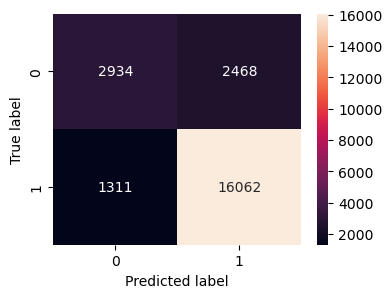

In [191]:
# Apply a confusion Matrix and derive the precision, recall and f1 score

cm = confusion_matrix(y_train, round(lg.predict(X_train6)))
labels = np.asarray(
        [
            ["{0:0.0f}".format(item)]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [192]:
recall = recall_score(y_train, round(lg.predict(X_train6)))  # to compute Recall
precision = precision_score(y_train, round(lg.predict(X_train6)))  # to compute Precision
f1 = f1_score(y_train, round(lg.predict(X_train6)))  # to compute F1-score

print(f'precision: {precision}, recall: {recall}, f1 score: {f1}')

precision: 0.866810577441986, recall: 0.9245380763253324, f1 score: 0.8947441717962287


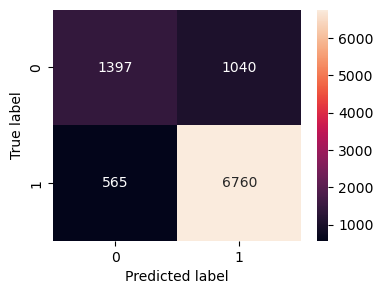

In [193]:
# Checking model performance on test set

cm = confusion_matrix(y_test, round(lg.predict(X_test6)))
labels = np.asarray(
        [
            ["{0:0.0f}".format(item)]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [194]:
recall = recall_score(y_test, round(lg.predict(X_test6)))  # to compute Recall
precision = precision_score(y_test, round(lg.predict(X_test6)))  # to compute Precision
f1 = f1_score(y_test, round(lg.predict(X_test6)))  # to compute F1-score

print(f'precision: {precision}, recall: {recall}, f1 score: {f1}')

precision: 0.8666666666666667, recall: 0.9228668941979522, f1 score: 0.8938842975206612


## AUC ROC Score

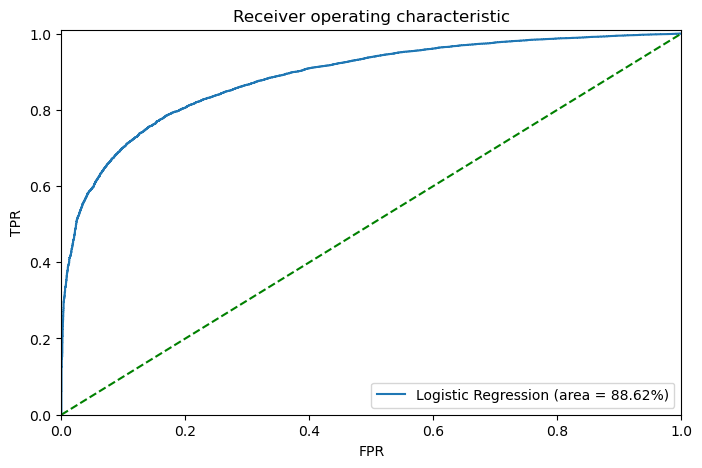

In [195]:
roc_auc = roc_auc_score(y_train, lg.predict(X_train6)) # Getting the best auc roc score
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train6))
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (area = {round(roc_auc,4) * 100}%)")
plt.plot([0, 1], [0, 1], "g--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [196]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be at the top left corner of curve where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train6))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.7485346203881916


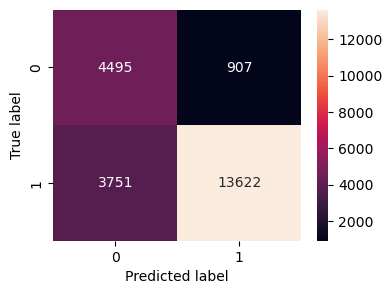

In [197]:
# checking which probabilities are greater than threshold
pred = lg.predict(X_train6) > optimal_threshold_auc_roc
# rounding off the above values to get classes
pred = round(pred)

cm = confusion_matrix(y_train, pred)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item)]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [198]:
recall = recall_score(y_train, pred)  # to compute Recall
precision = precision_score(y_train, pred)  # to compute Precision
f1 = f1_score(y_train, pred)  # to compute F1-score

print(f'precision: {precision}, recall: {recall}, f1 score: {f1}')

precision: 0.9375731296028632, recall: 0.7840902549933806, f1 score: 0.8539903454328883


The threshold has actually decreased the performance on f1 score. Also, precision and recall are very far apart from each other.

## Precision Recall Curve

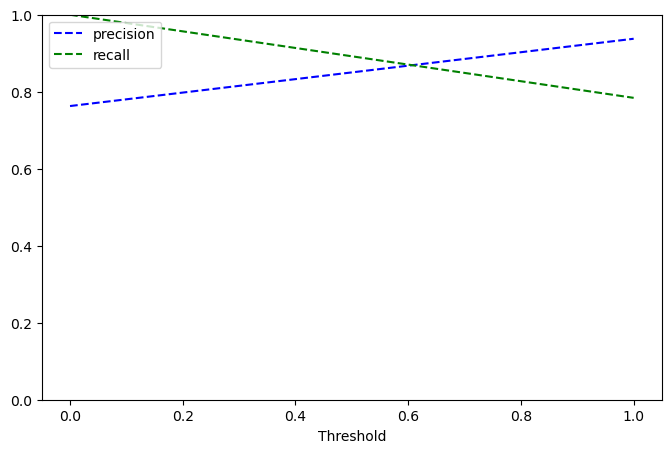

In [199]:
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "g--", label="recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

In [200]:
# The optimal threshold comes out to be around 0.59

optimal_threshold_precision_recall = 0.59

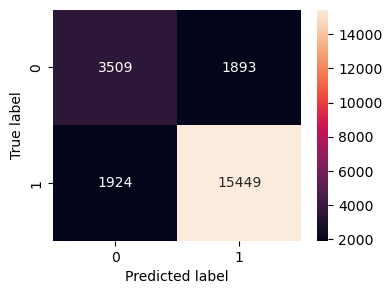

In [201]:
# checking which probabilities are greater than threshold
pred = lg.predict(X_train6) > optimal_threshold_precision_recall
# rounding off the above values to get classes
pred = round(pred)

cm = confusion_matrix(y_train, pred)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item)]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [202]:
recall = recall_score(y_train, pred)  # to compute Recall
precision = precision_score(y_train, pred)  # to compute Precision
f1 = f1_score(y_train, pred)  # to compute F1-score

print(f'precision: {precision}, recall: {recall}, f1 score: {f1}')

precision: 0.8908430400184523, recall: 0.8892534392448052, f1 score: 0.8900475298862163


We get a pretty balanced result for both precision and recall from the optimal threshold defined via precision recall curve. We will move ahead with this threshold value and finalize the results.

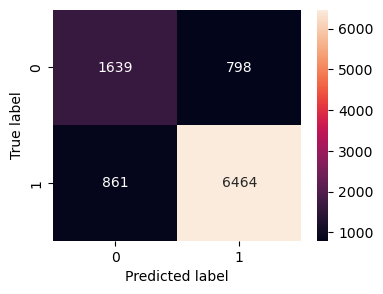

In [203]:
# finalizing the test results with precision recall threshold
# checking which probabilities are greater than threshold
pred = lg.predict(X_test6) > optimal_threshold_precision_recall
# rounding off the above values to get classes
pred = round(pred)

cm = confusion_matrix(y_test, pred)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item)]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [204]:
recall = recall_score(y_test, pred)  # to compute Recall
precision = precision_score(y_test, pred)  # to compute Precision
f1 = f1_score(y_test, pred)  # to compute F1-score

print(f'precision: {precision}, recall: {recall}, f1 score: {f1}')

precision: 0.890112916551914, recall: 0.8824573378839591, f1 score: 0.886268595324604


Pretty balanced results in test set as well indicating no overfitting in the model.

## **Converting coefficients to odds**

In order to find the odds, we have to take the exponential of the coefficients (θ) since these are in form of log(odds).

Therefore, odds=exp(θ)

Further, the % change in odds is given as (odds−1)∗100 or (exp(θ)-1)∗100

In [208]:
# converting coefficients to odds
odds = np.exp(lg.params)

# finding the percentage change
perc_change_odds = (odds - 1) * 100

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "% Change_odd": perc_change_odds}, index=X_train6.columns).head(20)

,Odds,% Change_odd
const,39.242833,3824.283293
age,0.671289,-32.871054
fnlwgt,0.935897,-6.410339
hours.per.week,0.699893,-30.010655
workclass_Federal-gov,0.626331,-37.366909
workclass_Local-gov,1.304364,30.436446
workclass_Self-emp-inc,0.792956,-20.704367
workclass_Self-emp-not-inc,1.594621,59.462051
workclass_State-gov,1.462796,46.279566
education_7th-8th,1.833762,83.376218


**Coefficient interpretations**

age: Keeping all other features constant, a 1 unit change in Age will decrease the odds of a person having income <=50k by ~0.67 times or a ~33% decrease.

working_hours_per_week: Keeping all other features constant, a 1 unit change in the hours.per.week will decrease the odds of a person having income <=50k by ~0.7 times or a decrease of ~30%.

marital_status: The odds of a person whose marital status is Never_married having a income <=50K is ~6.61 higher than the person who was married or ~561% higher odds of having salary <=50K than the person who was never married. Similarly, the odds of a person whose marital status is not_married having a salary <=50K is ~4.43 times higher than the person who was never married or ~343% higher odds of having a salary <=50K than the person who was never married. [the dropped category married is taken as a reference level]

**Other attributes can be interpreted similarly.**

## Decile Analysis for Business Metrics

In [214]:
train_data = pd.concat([y_train, lg.predict(X_train6)], axis = 1)
test_data = pd.concat([y_test, lg.predict(X_test6)], axis = 1)

train_data.columns = ['y_actual', 'y_pred_proba']
test_data.columns = ['y_actual', 'y_pred_proba']

In [217]:
train_data['Deciles'] = pd.qcut( train_data.y_pred_proba, 10, labels = False)
test_data['Deciles'] = pd.qcut( test_data.y_pred_proba, 10, labels = False)

In [219]:
train_data.head()

,y_actual,y_pred_proba,Deciles
20801,1,0.443406,1
14893,1,0.995032,8
21107,1,0.907878,5
21543,1,0.996881,9
745,0,0.498228,1


In [244]:
train_deciles = train_data.groupby('Deciles')[['y_pred_proba', 'y_actual']].agg( {'y_pred_proba' : ['min', 'max'], 
        'y_actual' : ['sum', 'count']} ).reset_index().sort_values(by = 'Deciles', ascending = False)
train_deciles

Deciles y_pred_proba           y_actual      
                   min       max      sum count
9       9     0.995237  0.999880     2275  2278
8       8     0.986446  0.995235     2264  2277
7       7     0.969067  0.986445     2235  2278
6       6     0.936757  0.969062     2194  2277
5       5     0.877812  0.936756     2069  2277
4       4     0.789795  0.877791     1908  2278
3       3     0.675983  0.789739     1637  2277
2       2     0.525291  0.675980     1331  2278
1       1     0.315492  0.525236      974  2277
0       0     0.018560  0.315387      486  2278

In [248]:
test_deciles = test_data.groupby('Deciles')[['y_pred_proba', 'y_actual']].agg( {'y_pred_proba' : ['min', 'max'], 
        'y_actual' : ['sum', 'count']} ).reset_index().sort_values(by = 'Deciles', ascending = False)
test_deciles

Deciles y_pred_proba           y_actual      
                   min       max      sum count
9       9     0.995165  0.999866      975   977
8       8     0.985747  0.995161      969   976
7       7     0.967020  0.985723      953   976
6       6     0.934262  0.967007      932   976
5       5     0.871581  0.934245      889   976
4       4     0.772707  0.871505      791   976
3       3     0.653206  0.772684      688   976
2       2     0.498701  0.652991      569   976
1       1     0.300826  0.498420      375   976
0       0     0.023878  0.300612      184   977

In [245]:
train_deciles.columns = train_deciles.columns.droplevel()
train_deciles.columns = ['Deciles', 'Pred_min', 'Pred_max', '<=50k', 'Total']
# Evaluate the cases of >50k in each decile
train_deciles['>50k'] = train_deciles.Total - train_deciles['<=50k']
train_deciles = train_deciles[['Deciles', 'Pred_min', 'Pred_max', '<=50k', '>50k', 'Total']]
train_deciles

,Deciles,Pred_min,Pred_max,<=50k,>50k,Total
9,9,0.995237,0.999880,2275,3,2278
8,8,0.986446,0.995235,2264,13,2277
7,7,0.969067,0.986445,2235,43,2278
6,6,0.936757,0.969062,2194,83,2277
5,5,0.877812,0.936756,2069,208,2277
4,4,0.789795,0.877791,1908,370,2278
3,3,0.675983,0.789739,1637,640,2277
2,2,0.525291,0.675980,1331,947,2278
1,1,0.315492,0.525236,974,1303,2277
0,0,0.018560,0.315387,486,1792,2278


In [249]:
test_deciles.columns = test_deciles.columns.droplevel()
test_deciles.columns = ['Deciles', 'Pred_min', 'Pred_max', '<=50k', 'Total']
# Evaluate the cases of >50k in each decile
test_deciles['>50k'] = test_deciles.Total - test_deciles['<=50k']
test_deciles = test_deciles[['Deciles', 'Pred_min', 'Pred_max', '<=50k', '>50k', 'Total']]
test_deciles

,Deciles,Pred_min,Pred_max,<=50k,>50k,Total
9,9,0.995165,0.999866,975,2,977
8,8,0.985747,0.995161,969,7,976
7,7,0.967020,0.985723,953,23,976
6,6,0.934262,0.967007,932,44,976
5,5,0.871581,0.934245,889,87,976
4,4,0.772707,0.871505,791,185,976
3,3,0.653206,0.772684,688,288,976
2,2,0.498701,0.652991,569,407,976
1,1,0.300826,0.498420,375,601,976
0,0,0.023878,0.300612,184,793,977


As you can see, the instances for <=50 are highest in initial couple of deciles for both train and test set. These instances are continuously decreasing as we move towards the lower deciles. On the other hand, the instances for >50k are continuously increasing as we move towards lower deciles. 

This is an excellent metric to cross check the work that we have done so far. In the initial set of deciles, there is a sure shot guarantee of getting individuals with income <=50k and the same can be observed for >50k in last few deciles.

You may observe that in most of the deciles, we have higher chances of getting observations <=50 which makes sense as the frequency of these observations are much higher in comparison to >50k set of observations.